<a href="https://colab.research.google.com/github/kk-ykos/Customer_Churn-Analysis-_and_prediction_-Telco/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Dataset**

The data set that we will use is called telco.csv and it is a data from the Telecommuncations industry. We shall first import the various packages that we will need to work on our problem. You will notice below that we have also imported the code snippet from IPython.core.interactiveshell... which will allow us to output multiple outputs from code in the same cell. Typically if you have multiple commands in the same cell, then the default in Jupyter is that it will display output only from the last line of code. As we go through the data exploration phase, we will observe the data idiosyncracies and note down these oservations

The dataset to be used in this session is a CSV file named telco.csv, which contains data on telecom customers churning and some of their key behaviors. It contains the following columns:

Features:

    customerID: Unique identifier of a customer.
    gender: Gender of customer.
    SeniorCitizen: Binary variable indicating if customer is senior citizen.
    Partner: Binary variable if customer has a partner.
    Dependents: Binary variable if customer has dependent.
    tenure: Number of weeks as a customer.
    PhoneService: Whether customer has phone service.
    MultipleLines: Whether customer has multiple lines.
    InternetService: What type of internet service customer has ("DSL", "Fiber optic", "No").
    OnlineSecurity: Whether customer has online security service.
    OnlineBackup: Whether customer has online backup service.
    DeviceProtection: Whether customer has device protection service.
    TechSupport: Whether customer has tech support service.
    StreamingTV: Whether customer has TV streaming service.
    StreamingMovies: Whether customer has movies streaming service.
    Contract: Customer Contract Type ('Month-to-month', 'One year', 'Two year').
    PaperlessBilling: Whether paperless billing is enabled.
    PaymentMethod: Payment method.
    MonthlyCharges: Amount of monthly charges in $.
    TotalCharges: Amount of total charges so far.
    
   Target Variable:

    Churn: Whether customer 'Stayed' or 'Churned'.

    

    

In [40]:
   #import pandas
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### **Data Exploration**

In [ ]:
#uploade the datafile from local drive
from google.colab import files
uploaded = files.upload()

Saving telco-churn.csv to telco-churn (1).csv


In [ ]:
#read in dataset
import io
telco = pd.read_csv(io.BytesIO(uploaded['telco-churn.csv']), index_col='Unnamed: 0')
pd.set_option('display.max_columns', None)

In [ ]:
#see the first five records
telco.head()
#see the dimenstions of the data and investigate if there are any duplicate rows
telco.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


(7043, 21)

* **Observation 1**: For the purpose of machine 
learnig the CustomerID does not have any predictive power hence will be dropped

* **Observation 2**: Categorical variables need to be encoded for machine learning



In [19]:
#print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation 3**: `TotalCharges` column is of type object - it needs to be coverted to `float`.






In [20]:
#take a look at no. of unique values in telco
telco.nunique()
#Finding the total null values for each column
print(telco.isnull().sum())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        4
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Observation 4:** The ```InternetService``` column should have ```'DSL'```,```'Fiber optic'``` and ```'No'``` as values - yet here there are 4 unique values. 





In [21]:
#finding unique values of InternetService
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No', 'dsl'], dtype=object)

In [22]:
#Calculate summary statistics
summary = telco.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(telco.describe(include='all'))

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933


        customerID gender SeniorCitizen Partner Dependents       tenure  \
count         7043   7043          7043    7043       7043  7043.000000   
unique        7043      2             2       2          2          NaN   
top     7590-VHVEG   Male            No      No         No          NaN   
freq             1   3555          5901    3641       4933          NaN   
mean           NaN    NaN           NaN     NaN        NaN    32.371149   
std            NaN    NaN           NaN     NaN        NaN    24.559481   
min            NaN    NaN           NaN     NaN        NaN     0.000000   
25%            NaN    NaN           NaN     NaN        NaN     9.000000   
50%            NaN    NaN           NaN     NaN        NaN    29.000000   
75%            NaN    NaN           NaN     NaN        NaN    55.000000   
max            NaN    NaN           NaN     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
count          704

**Observation 5**: The ```InternetService``` column has a ```'dsl'``` value that needs ti be collapsed to ```'DSL'```

The **null model** is a model of reference to use for classification accuracy - where the **null accuracy** is accuracy of the model if we alwayschoose most frequent class(or outcome). Accuracy is determined here by following:

accracy = No. of times model is right / Total no. of predictions



In [29]:
#frequency distribution of some key variables
telco['Churn'].value_counts()
telco['InternetService'].value_counts()
telco['TotalCharges'].value_counts()
telco['TotalCharges'].isnull().sum()

Stayed     5174
Churned    1869
Name: Churn, dtype: int64

Fiber optic    3096
DSL            2391
No             1526
dsl              30
Name: InternetService, dtype: int64

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

0


**Use pandas_profiling for small datasets**

conda install `-c conda-forge pandas-profiling --` use this code snippet on your command line to install pandas-profiling which provides a comprehensive report on the variables and various statistics around it. It can be fairly overwhelming but is useful with smaller datasets - say a few thousand observations and 75+ variables `pandas_profiling.ProfileReport(telco)` I do not use it here and not recommended for large datasets


<AxesSubplot:>

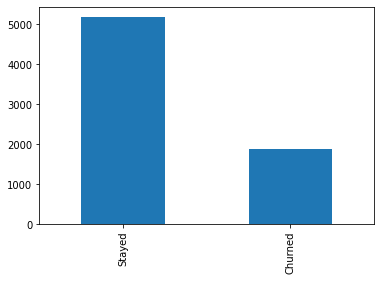

In [41]:
#finding the null model
telco['Churn'].value_counts().plot(kind='bar')

In [39]:
#find the null model
telco['Churn'].value_counts()/telco.shape[0]

Stayed     0.73463
Churned    0.26537
Name: Churn, dtype: float64

# **Data Cleaning**



**Task 1**: **Dropping** `customerID` **column**

To drop a column from a DataFrame - we can use the .drop() method alongside the following arguments:

 * Name of column dropped - in this example `'customerID'`
 * axis: Whether to drop row (`0`), or column (`1`).
 * inplace: Boolean whether to drop in place and overwrite change in DataFrame.



In [42]:
 #Drop customer ID column
telco.drop('customerID', axis = 1, inplace = True)


**Task 2: Converting** `TotalCharges` **column**

To convert a column from string to numeric - we can use the `pd.to_numeric()` function - which takes the following arguments:

* Name of column to convert - in this example `'TotalCharges'`
* errors: Whether to `'raise'` an error if it cannot be converted or to `'coerce'` it to `NaN`.





In [44]:
# Convert TotalCharges to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

In [45]:
# Print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [46]:
# Print # of missing values
telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Observation 5: The TotalCharges column has 11 missing values here - we can either drop them or impute the missing values with a statistical measure (*e.g. median or mean*).


# **Handling missing values - dropping them or replacing them**

To remove all rows with `NaN`s in column `x` use `dropna`: t`elco = telco.dropna(subset=['TotalCharges']) telco['TotalCharges'].fillna(mode(telco['TotalCharges']).mode[0], inplace=True)`

We do not do it here but substitute missing values with their mean. Alternatively you can also replace missing values with their median `telco.loc[telco['TotalCharges'].isna(), 'TotalCharges'] = telco['TotalCharges'].median()`


In [47]:
telco['TotalCharges'].fillna((telco['TotalCharges'].mean()), inplace=True) 
telco.shape

(7043, 20)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

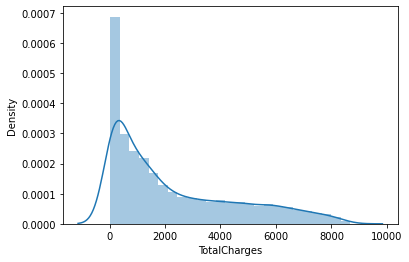

In [48]:
# Visualize distribution of TotalCharges
sns.distplot(telco['TotalCharges'])

In [49]:
# Get distribution of TotalCharges
telco['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

As a reminder, the `.loc[]` method lets us slice a DataFrame by a group of rows or columns by labels or boolean arrays - meaning we can subset a DataFrame `df` as such:

`df.loc[row condition, column label]`


In [50]:
# Make sure no more missing values
telco['TotalCharges'].isna().sum()

0



**Task 3**: **Collapse** values of `InternetService` **column**

To replace the values in of a column `col_A` in a DataFrame `df` - we can use the `.replace()` method which takes in a dictionary mapping the `old_value` to the `new_value` as such:

`df['col_A'] = df['col_A'].replace({old_value : new_value})`



In [51]:
# Collapse/Replace'dsl' into 'DSL'
telco['InternetService'] = telco['InternetService'].replace({'dsl':"DSL"})
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)